In [136]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification

In [137]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [138]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-2.254816,-0.987591,-2.663904,-2.421782,-0.369958,0
1,-1.788814,-5.370271,2.975872,0.359902,0.170843,1
2,-1.564328,-1.600119,-0.293213,-0.223202,-0.411445,1
3,-1.398899,-1.842813,-1.756557,-3.013499,-0.169100,0
4,-0.187610,-1.272495,0.813267,0.995435,2.180036,0


In [139]:
# function for row sampling
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [180]:
# function for feature sampling
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [141]:
# function for combined sampling
def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

## Row Sampling

In [142]:
df1 = sample_rows(df,0.1)

In [143]:
df2 = sample_rows(df,0.1)

In [144]:
df3 = sample_rows(df,0.1)

In [145]:
df1

,col1,col2,col3,col4,col5,target
30,-2.179591,-0.281331,0.638672,-0.807626,2.526991,0
4,-0.187610,-1.272495,0.813267,0.995435,2.180036,0
19,-0.895009,1.005138,-0.634094,0.154675,2.289276,0
36,-0.996757,-0.637552,-1.113961,-0.825532,0.768670,1
34,-1.994141,0.372644,-0.676050,-0.132716,2.232284,0
11,-0.035419,0.835471,-0.156574,-0.056246,2.397221,0
2,-1.564328,-1.600119,-0.293213,-0.223202,-0.411445,1
79,-2.543641,0.040750,-2.341133,-0.922924,0.527066,0
40,-0.577306,0.379605,-0.273616,-1.779931,2.065581,1
26,0.562515,-2.046870,-0.969501,-4.278427,0.210257,0


In [146]:
df2

,col1,col2,col3,col4,col5,target
12,0.001690,-0.374013,1.999634,-0.399527,1.589380,1
15,-3.432156,-2.205179,-1.586108,-1.378803,0.554326,0
1,-1.788814,-5.370271,2.975872,0.359902,0.170843,1
21,-1.502434,-0.296650,-3.555340,-2.219495,1.473316,1
44,-0.825001,-0.998267,-3.478331,-3.242466,-0.789178,0
77,-2.822990,-1.975915,-2.298864,-2.554592,0.227349,1
48,-4.487914,-7.060358,-0.677462,-2.847397,0.353697,1
75,0.028092,-0.334355,1.617817,-0.202789,1.234136,1
88,0.286851,0.680498,2.587291,-0.471780,1.472578,1
6,-0.847767,-1.322974,1.597113,-0.550779,2.597200,0


In [147]:
df3

,col1,col2,col3,col4,col5,target
51,0.537997,-2.909472,-2.706816,-2.035554,-1.500404,0
2,-1.564328,-1.600119,-0.293213,-0.223202,-0.411445,1
92,-0.336258,-0.352395,0.176579,-0.352836,1.116285,1
66,-1.225508,-0.759965,-1.876981,-1.308299,0.417291,0
35,-3.887491,0.713773,-2.401448,-2.784083,0.835758,0
31,-0.110473,-0.796190,2.017417,0.447937,0.499540,1
71,-0.693608,1.160052,0.334665,0.851371,3.295649,0
23,0.248536,-0.352403,-1.935769,-0.887066,0.376592,0
30,-2.179591,-0.281331,0.638672,-0.807626,2.526991,0
92,-0.336258,-0.352395,0.176579,-0.352836,1.116285,1


In [148]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [149]:
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

In [150]:
dt1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
dt2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
dt3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(223.20000000000002, 190.26, 'X[4] <= 2.123\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'), Text(167.4, 135.9, 'X[4] <= 0.648\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'), Text(111.60000000000001, 81.53999999999999, 'X[4] <= -0.101\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'), Text(55.800000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'), Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'), Text(279.0, 135.9, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]


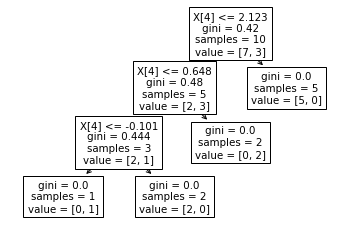

In [151]:
print(plot_tree(dt1))

[Text(223.20000000000002, 190.26, 'X[1] <= -0.686\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(167.4, 135.9, 'X[4] <= 0.454\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(111.60000000000001, 81.53999999999999, 'X[2] <= -2.889\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

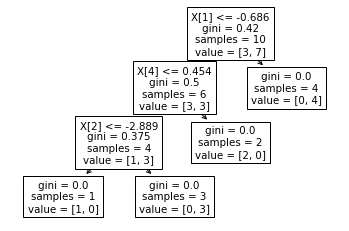

In [152]:
plot_tree(dt2)

[Text(223.20000000000002, 190.26, 'X[1] <= -0.686\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(167.4, 135.9, 'X[4] <= 0.454\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(111.60000000000001, 81.53999999999999, 'X[2] <= -2.889\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

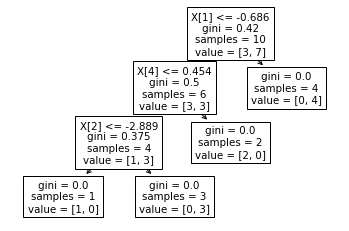

In [153]:
plot_tree(dt2)

In [154]:
dt1.predict(np.array([-1.031818,-2.023482,-0.891465,-1.114938,1.404268]).reshape(1,5))

array([1])

In [155]:
dt2.predict(np.array([-1.031818,-2.023482,-0.891465,-1.114938,1.404268]).reshape(1,5))

array([0])

In [156]:
dt3.predict(np.array([-1.031818,-2.023482,-0.891465,-1.114938,1.404268]).reshape(1,5))

array([0])

## Column Sampling

In [181]:
df1 = sample_features(df,0.5)
df1

<ipython-input-180-208d2966d7f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col1,col2,target
0,-2.254816,-0.987591,0
1,-1.788814,-5.370271,1
2,-1.564328,-1.600119,1
3,-1.398899,-1.842813,0
4,-0.187610,-1.272495,0
...,...,...,...
95,0.068066,1.754455,0
96,-0.459911,-2.289307,1
97,-0.327966,0.695149,1
98,-0.416995,-0.611238,1


In [182]:
df2 = sample_features(df,0.5)
df2

<ipython-input-180-208d2966d7f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col4,col3,target
0,-2.421782,-2.663904,0
1,0.359902,2.975872,1
2,-0.223202,-0.293213,1
3,-3.013499,-1.756557,0
4,0.995435,0.813267,0
...,...,...,...
95,-0.604092,-1.478291,0
96,2.049290,1.753854,1
97,-0.963534,-0.026303,1
98,-0.895098,2.682594,1


In [183]:
df3 = sample_features(df,0.5)
df3

<ipython-input-180-208d2966d7f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col3,col5,target
0,-2.663904,-0.369958,0
1,2.975872,0.170843,1
2,-0.293213,-0.411445,1
3,-1.756557,-0.169100,0
4,0.813267,2.180036,0
...,...,...,...
95,-1.478291,1.559207,0
96,1.753854,-0.891092,1
97,-0.026303,1.147729,1
98,2.682594,1.394408,1


In [187]:
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

dt1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
dt2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
dt3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [189]:
dt1.predict(np.array([-2.663904,-0.369958]).reshape(1,2))

array([0])

In [190]:
dt2.predict(np.array([-2.663904,-0.369958]).reshape(1,2))

array([1])

In [191]:
dt3.predict(np.array([-2.663904,-0.369958]).reshape(1,2))

array([0])

## Combination Sampling

In [194]:
df1 = combined_sampling(df,0.5,0.5)
df1

<ipython-input-180-208d2966d7f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col3,col2,target
4,0.813267,-1.272495,0
16,-1.975533,-0.193475,0
50,-3.168616,-2.076555,0
73,-0.324116,-2.503325,0
96,1.753854,-2.289307,1
71,0.334665,1.160052,0
62,1.226535,-4.329212,1
96,1.753854,-2.289307,1
82,-1.709796,-2.978073,0
41,-1.381045,0.989672,0


In [195]:
df2 = combined_sampling(df,0.5,0.5)
df2

<ipython-input-180-208d2966d7f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col3,col5,target
84,-2.514440,1.431300,0
67,-0.180664,2.255383,0
66,-1.876981,0.417291,0
70,-1.159469,-0.840922,1
60,1.936218,-0.205948,1
52,0.757522,2.313777,1
10,-0.185039,0.984680,1
5,-1.451895,1.809858,1
4,0.813267,2.180036,0
76,1.910047,-0.758624,1


In [196]:
df3 = combined_sampling(df,0.5,0.5)
df3

<ipython-input-180-208d2966d7f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col2,col5,target
33,1.794821,1.300637,1
38,-0.031986,3.256022,0
61,-1.154928,2.558605,0
42,1.086790,2.245439,0
81,-1.931552,0.798208,1
39,-2.748213,2.577529,1
95,1.754455,1.559207,0
4,-1.272495,2.180036,0
80,0.821588,3.619489,1
33,1.794821,1.300637,1


In [197]:
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

dt1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
dt2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
dt3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(193.15384615384616, 203.85, 'X[0] <= 1.02\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(103.01538461538462, 176.67000000000002, 'X[1] <= -2.983\ngini = 0.4\nsamples = 29\nvalue = [21, 8]'),
 Text(77.26153846153846, 149.49, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(128.76923076923077, 149.49, 'X[0] <= -0.527\ngini = 0.346\nsamples = 27\nvalue = [21, 6]'),
 Text(77.26153846153846, 122.31, 'X[0] <= -2.137\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(51.50769230769231, 95.13, 'X[1] <= -2.026\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(25.753846153846155, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(77.26153846153846, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(103.01538461538462, 95.13, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(180.27692307692308, 122.31, 'X[0] <= 0.215\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(154.52307692307693, 95.13, 'X[1] <= 0.765\ngini = 0.469\nsamples = 8\nval

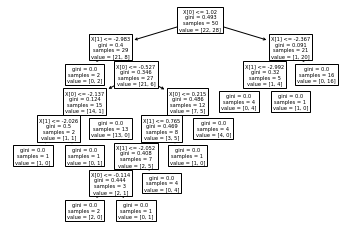

In [201]:
plot_tree(dt1)

[Text(213.05454545454546, 205.35999999999999, 'X[0] <= 1.849\ngini = 0.449\nsamples = 50\nvalue = [33, 17]'),
 Text(182.61818181818182, 181.2, 'X[1] <= 1.817\ngini = 0.391\nsamples = 45\nvalue = [33, 12]'),
 Text(121.74545454545455, 157.04, 'X[0] <= 0.582\ngini = 0.471\nsamples = 29\nvalue = [18, 11]'),
 Text(91.30909090909091, 132.88, 'X[1] <= 1.452\ngini = 0.426\nsamples = 26\nvalue = [18, 8]'),
 Text(60.872727272727275, 108.72, 'X[0] <= -1.281\ngini = 0.34\nsamples = 23\nvalue = [18, 5]'),
 Text(30.436363636363637, 84.56, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(91.30909090909091, 84.56, 'X[1] <= -0.037\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(60.872727272727275, 60.400000000000006, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(121.74545454545455, 60.400000000000006, 'X[1] <= 0.935\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(91.30909090909091, 36.24000000000001, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(152.1818181818182, 36.24000000000001,

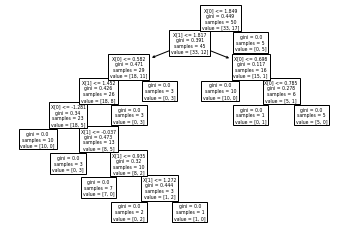

In [202]:
plot_tree(dt2)

[Text(219.7125, 206.56799999999998, 'X[0] <= -2.956\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(198.7875, 184.824, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(240.63750000000002, 184.824, 'X[0] <= 1.096\ngini = 0.482\nsamples = 42\nvalue = [25, 17]'),
 Text(188.32500000000002, 163.07999999999998, 'X[1] <= 3.438\ngini = 0.431\nsamples = 35\nvalue = [24, 11]'),
 Text(167.4, 141.336, 'X[1] <= 1.823\ngini = 0.415\nsamples = 34\nvalue = [24, 10]'),
 Text(125.55000000000001, 119.592, 'X[1] <= 1.088\ngini = 0.476\nsamples = 23\nvalue = [14, 9]'),
 Text(104.625, 97.848, 'X[1] <= 0.878\ngini = 0.346\nsamples = 18\nvalue = [14, 4]'),
 Text(83.7, 76.10399999999998, 'X[1] <= 0.75\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(41.85, 54.360000000000014, 'X[0] <= -0.881\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(20.925, 32.615999999999985, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(62.775000000000006, 32.615999999999985, 'X[0] <= -0.136\ngini = 0.444\nsamples =

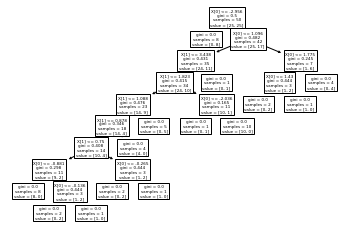

In [203]:
plot_tree(dt3)

In [198]:
dt1.predict(np.array([-1.013497,-0.314836]).reshape(1,2))

array([0])

In [199]:
dt2.predict(np.array([-1.013497,-0.314836]).reshape(1,2))

array([1])

In [200]:
dt3.predict(np.array([-1.013497,-0.314836]).reshape(1,2))

array([0])